In [137]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [138]:
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, complete,average
from sklearn.metrics.pairwise import cosine_similarity,nan_euclidean_distances 
from sklearn.cluster import DBSCAN,AgglomerativeClustering, KMeans
from sklearn.neighbors import NearestNeighbors
from mlxtend.frequent_patterns import apriori, association_rules


In [139]:
#Loading the input data file
df = pd.read_csv("cc_general.csv")


In [140]:
#1. EDA and Preprocessing
print('SIZE OF DATA:\n', df.shape)   

SIZE OF DATA:
 (8950, 18)


In [141]:
print('ATTRIBUTE LIST:\n', df.columns)

ATTRIBUTE LIST:
 Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [142]:
print('DATA TYPE OF ATTRIBUTES:\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [143]:
#Finding NA values across data 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [144]:
#Since Cust_Id will have no impact on the segmentation, it is better to drop this column
#Since minimum_payments has lot of missing values , we are dropping this as well.
df = df.drop(['CUST_ID'], axis = 1)
df = df.drop(['MINIMUM_PAYMENTS'], axis = 1)
df = df.drop(['CREDIT_LIMIT'], axis = 1)


In [145]:
df.shape

(8950, 15)

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.values[:] = scaler.fit_transform(df)

In [147]:
df.head

<bound method NDFrame.head of           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1      

In [148]:
print('NUMERICAL ATTRIBUTE STATISTIC:\n', df.describe())

NUMERICAL ATTRIBUTE STATISTIC:
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000

In [149]:
print('SAMPLE DATA:\n',df.head()) 

SAMPLE DATA:
        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2  

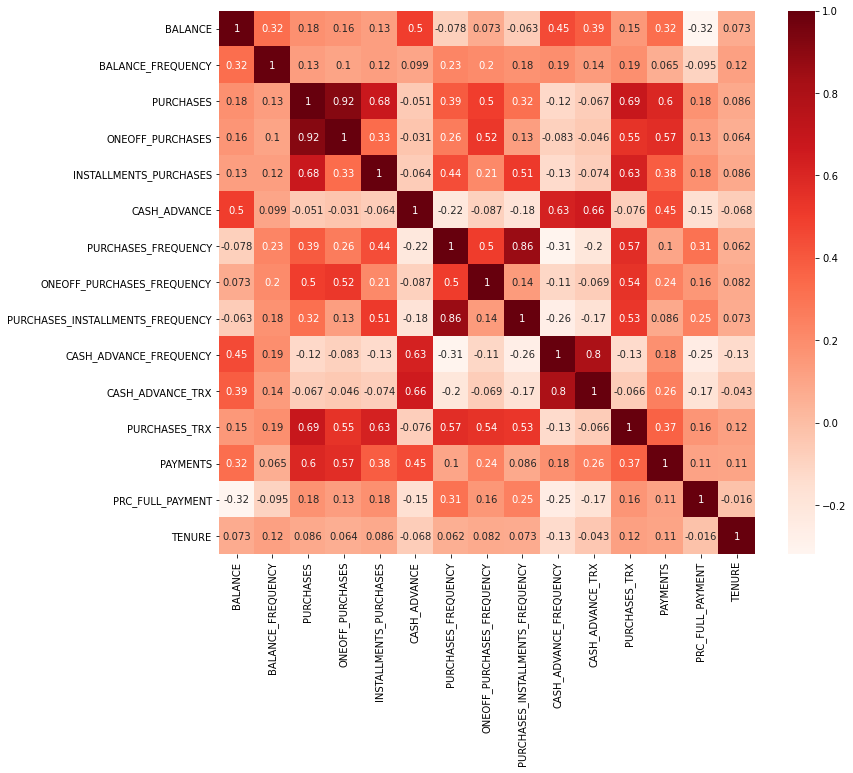

In [150]:
#Finding correlation between different fields in the input data
plt.figure(figsize=(12,10))
cor2 = df.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()

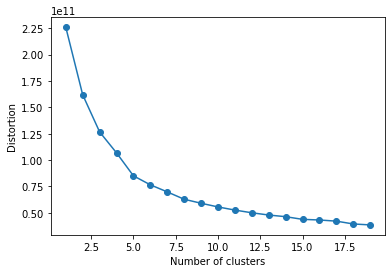

In [151]:
#Elbow method for k-means clustering 

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [152]:
#using elbow method, we found the optimal number of clusters for the given data to be 7
km = KMeans(
    n_clusters=7, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df)

print('CLUSTER FORMED WITH LABELS: ',y_km,'\n')
cluster_labels_ = km.labels_

CLUSTER FORMED WITH LABELS:  [5 2 5 ... 5 5 5] 



In [166]:
cluster1 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')
cluster1.fit_predict(df)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
cluster2 = AgglomerativeClustering(n_clusters=7, affinity='manhattan', linkage='single')
cluster2.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
cluster3 = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='single')
cluster3.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
cluster4 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')
cluster4.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [170]:
cluster5 = AgglomerativeClustering(n_clusters=7, affinity='manhattan', linkage='complete')
cluster5.fit_predict(df)

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [171]:
cluster6 = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='complete')
cluster6.fit_predict(df)

array([1, 3, 0, ..., 5, 1, 6], dtype=int64)

In [172]:
cluster7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
cluster7.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
cluster8 = AgglomerativeClustering(n_clusters=7, affinity='manhattan', linkage='average')
cluster8.fit_predict(df)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [174]:
cluster9 = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='average')
cluster9.fit_predict(df)

array([3, 2, 4, ..., 3, 1, 5], dtype=int64)

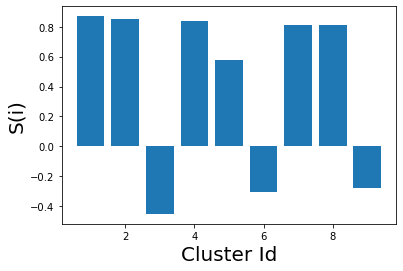

In [175]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df, cluster1.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster2.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster3.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster4.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster5.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster6.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster7.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster8.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, cluster9.fit_predict(df)))


k = [1,2,3,4,5,6,7,8,9]
plt.bar(k, silhouette_scores)
plt.xlabel('Cluster Id', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()



In [ ]:
#Silhouette score is highest for cluster id 1 i.e. Single linkage with Euclidean distance. 

In [ ]:
#Density Based CLustering ( DBSCAN)

In [ ]:
#Finding optimum epsilon and MinPts parameters:
#Choosing MinPts to be double the number of dimensions (15*2 = 30) and using n_neighbours to find optimum epsilon

In [188]:
neigh = NearestNeighbors(n_neighbors=30)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

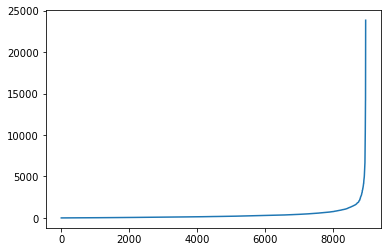

In [189]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [192]:
db_cluster = DBSCAN(eps = 1500, min_samples = 30).fit(df)
labels = db_cluster.labels_
print (labels)

[ 0 -1  0 ...  0  0  0]
